# PROYECTO DATA SCIENCE ENGINEERING OF SCIENCE

### PREGUNTAS

- ¿Existe una correlación significativa entre la tasa de suicidios y el promedio de
ingresos a nivel nacional en diferentes países?, si es que existe ¿Cómo ha
evolucionado a lo largo de la última década?
- ¿Cómo han evolucionado las tasas de suicidios en diferentes países a lo largo de la
última década? (Países con mayor aumento y países con menor aumento)
- ¿Cómo influye la desigualdad de ingresos en la tasa de suicidios dentro de un país
en comparación con el nivel global?
- ¿Existe una relación entre la tasa de suicidios de un país por cada 100.000
habitantes y el nivel educativo de estos?
- ¿Cómo afecta la religión a la tasa de suicidios en diferentes países?
- ¿Cómo influye el acceso a la tecnología en la tasa de suicidios en diferentes grupos
demográficos?
- ¿Se relaciona la tasa de suicidios con la esperanza de vida de los países?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests 

IMPORTAMOS LAS LIBRERIAS QUE USAREMOS

In [2]:
#https://www.datosmundial.com/ingreso-promedio.php
ingresos_mundo= pd.read_csv('Datos/income.csv', sep=',')
ingresos_mundo.rename(columns={'LOCATION':'CodigoPais'}, inplace=True)
ingresos_mundo2009 = ingresos_mundo[ingresos_mundo["TIME"]==2009]
ingresos_mundo2019 = ingresos_mundo[ingresos_mundo["TIME"]==2019]
ingresos_mundo

,CodigoPais,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,AVWAGE,TOT,USD,A,2018,57843.000000,NaN
1,AUS,AVWAGE,TOT,USD,A,2019,58620.000000,NaN
2,AUS,AVWAGE,TOT,USD,A,2020,60377.000000,NaN
3,AUS,AVWAGE,TOT,USD,A,2021,60681.498547,NaN
4,AUS,AVWAGE,TOT,USD,A,2022,59407.889979,NaN
...,...,...,...,...,...,...,...,...
185,COL,AVWAGE,TOT,USD,A,2021,22248.491556,NaN
186,CRI,AVWAGE,TOT,USD,A,2018,27709.000000,NaN
187,CRI,AVWAGE,TOT,USD,A,2019,28524.000000,NaN
188,CRI,AVWAGE,TOT,USD,A,2020,31341.000000,NaN


CREAMOS UN DATAFRAME CON LOS INGRESOS MEDIOS DE CADA PAIS EN AMBOS AÑOS A COMPARAR

In [3]:
df_suicidio_oms= pd.read_excel('Datos/data.xlsx',skiprows=2)
pd.set_option('display.max_columns', None)
df_suicidio_oms.dropna(thresh=0.2, inplace=True)


In [4]:
df_suicidio_oms_clean=df_suicidio_oms[['ParentLocation','SpatialDimValueCode','Location','Period','Dim1','FactValueNumeric']]
#renomvramos la columna spatialdimvaluecode por codigo pais
df_suicidio_oms_clean.rename(columns={'SpatialDimValueCode':'CodigoPais'}, inplace=True)    


C:\Users\mxtrco\AppData\Local\Temp\ipykernel_10504\3976077051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suicidio_oms_clean.rename(columns={'SpatialDimValueCode':'CodigoPais'}, inplace=True)


In [5]:
suicidios2009 = df_suicidio_oms_clean[df_suicidio_oms_clean['Period'] == 2009]
suicidios2009 = suicidios2009[suicidios2009['Dim1'] == "Both sexes"]

In [6]:
suicidios2019 = df_suicidio_oms_clean[df_suicidio_oms_clean['Period'] == 2019]
suicidios2019 = suicidios2019[suicidios2019['Dim1'] == "Both sexes"]


  ## 1. ¿Existe una correlación significativa entre la tasa de suicidios y el promedio de ingresos a nivel nacional en diferentes países?, si es que existe ¿Cómo ha evolucionado a lo largo de la última década? (Martín)

In [7]:
#haremos un merge de los datos de suicidios con los datos de ingresos
suicidios_ingresos2009 = suicidios2009.merge(ingresos_mundo2009, on="CodigoPais", how="left")
suicidios_ingresos2019 = suicidios2019.merge(ingresos_mundo2019, on="CodigoPais")
suicidios_ingresos2009.head(15)

,ParentLocation,CodigoPais,Location,Period,Dim1,FactValueNumeric,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,Africa,AGO,Angola,2009,Both sexes,6.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,BDI,Burundi,2009,Both sexes,7.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,BEN,Benin,2009,Both sexes,8.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,BFA,Burkina Faso,2009,Both sexes,7.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,BWA,Botswana,2009,Both sexes,25.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Africa,CAF,Central African Republic,2009,Both sexes,15.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Africa,CIV,Côte d’Ivoire,2009,Both sexes,10.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa,CMR,Cameroon,2009,Both sexes,11.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Africa,COD,Democratic Republic of the Congo,2009,Both sexes,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Africa,COG,Congo,2009,Both sexes,9.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
suicidios_ingresos2019.head(15)

,ParentLocation,CodigoPais,Location,Period,Dim1,FactValueNumeric,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,Americas,CAN,Canada,2019,Both sexes,11.81,AVWAGE,TOT,USD,A,2019,56370.0,NaN
1,Americas,CHL,Chile,2019,Both sexes,8.97,AVWAGE,TOT,USD,A,2019,33190.0,NaN
2,Americas,COL,Colombia,2019,Both sexes,3.90,AVWAGE,TOT,USD,A,2019,21751.0,NaN
3,Americas,CRI,Costa Rica,2019,Both sexes,8.06,AVWAGE,TOT,USD,A,2019,28524.0,NaN
4,Americas,MEX,Mexico,2019,Both sexes,5.31,AVWAGE,TOT,USD,A,2019,18031.0,NaN
5,Americas,USA,United States of America,2019,Both sexes,16.14,AVWAGE,TOT,USD,A,2019,73194.0,NaN
6,Europe,AUT,Austria,2019,Both sexes,14.60,AVWAGE,TOT,USD,A,2019,64623.0,NaN
7,Europe,BEL,Belgium,2019,Both sexes,18.29,AVWAGE,TOT,USD,A,2019,65700.0,NaN
8,Europe,CHE,Switzerland,2019,Both sexes,14.54,AVWAGE,TOT,USD,A,2019,71189.0,NaN
9,Europe,CZE,Czechia,2019,Both sexes,12.18,AVWAGE,TOT,USD,A,2019,36071.0,NaN


## 2. ¿Cómo han evolucionado las tasas de suicidios en diferentes países a lo largo de la última década? (Países con mayor aumento y países con menor aumento) (Josías)

## 3. ¿Cómo influye la desigualdad de ingresos en la tasa de suicidios dentro de un país en comparación con el nivel global? (Akira)

# 4. ¿Existe una relación entre la tasa de suicidios de un país por cada 100.000 habitantes y el nivel educativo de este? (Mati)

En este caso escogeremos a chile para poder responder esta pregunta

In [9]:
suicidios_chile_2 = pd.read_csv("Datos/16BBF41_ALL_LATEST.csv")
suicidios_chile_2 = suicidios_chile_2[suicidios_chile_2["GEO_NAME_SHORT"] == "Chile"]
suicidios_chile_2 = suicidios_chile_2[["DIM_TIME","DIM_SEX","DIM_AGE","VALUE_NUMERIC"]]
suicidios_chile_2.rename(columns={"DIM_TIME":"AÑO","DIM_SEX":"SEXO","DIM_AGE":"EDADES","VALUE_NUMERIC":"MUERTES"}, inplace=True)
edades_deseadas = ["15 to 24 years", "25 to 34 years", "35 to 44 years", "45 to 54 years", "55 to 64 years", "65 to 74 years", "75 to 84 years", "85 plus years"]
df_suicidios = suicidios_chile_2[(suicidios_chile_2["AÑO"] == 2019) & (suicidios_chile_2["SEXO"] == "Total")]
df_suicidios = df_suicidios[df_suicidios["EDADES"].isin(edades_deseadas)]
df_suicidios["MUERTES"] = round(df_suicidios["MUERTES"],1)
df_suicidios = df_suicidios[["EDADES","MUERTES"]]
df_suicidios

,EDADES,MUERTES
12047,25 to 34 years,10.1
12048,45 to 54 years,13.7
12049,55 to 64 years,12.3
12100,35 to 44 years,11.8
12101,75 to 84 years,13.8
12110,15 to 24 years,7.4
12111,85 plus years,14.5
12256,65 to 74 years,10.7


In [10]:
df = pd.read_csv("Datos/censo/Microdato_Censo2017-Personas.csv", sep=";")
columnas = ["P08", # Sexo
            "P09", # Edad
            "P13", # Asiste actualmente a la educación formal
            "P14", # Curso o año más alto aprobado
            "P15", # Nivel del curso más alto aprobado
            "P15A" # Completó el nivel especificado
            ]
df = df[columnas]
df.rename(columns={"P08":"Sexo","P09":"Edad","P13":"Estudia",
                   "P14":"Año","P15":"Nivel","P15A":"Completado"}, inplace=True)
df.replace({99:np.nan, 98:np.nan}, inplace=True)
df_clean = df.dropna()

In [11]:
df_clean["Edad"] = df_clean["Edad"].astype(int)
df_clean["Estudia"] = df_clean["Estudia"].astype(int)
df_clean["Año"] = df_clean["Año"].astype(int)
df_clean["Nivel"] = df_clean["Nivel"].astype(int)
df_clean["Completado"] = df_clean["Completado"].astype(int)
df_clean["Sexo"].replace({1:"Hombre",2:"Mujer"},inplace=True)
df_clean["Estudia"].replace({1:"Si",2:"No",3:"Nunca"},inplace=True)
df_clean["Nivel_Nombre"] = df_clean["Nivel"].replace({1:"Sala cuna o jardín infantil",
                            2:"Prekínder",
                            3:"Kínder",
                            4:"Especial o diferencial",
                            5:"Educación básica",
                            6:"Primaria o preparatorio (sistema antiguo)",
                            7:"Científico-humanista",
                            8:"Técnica profesional",
                            9:"Humanidades (sistema antiguo)",
                            10:"Técnica comercial, industrial/normalista (sistema antiguo)",
                            11:"Técnico superior (1-3 años)",
                            12:"Profesional (4 o más años)",
                            13:"Magíster",
                            14:"Doctorado"}, inplace=True)
df_clean["Completado"].replace({1:"Si",2:"No"},inplace=True)

categorias = ["15 to 24 years","25 to 34 years","35 to 44 years","45 to 54 years","55 to 64 years","65 to 74 years","75 to 84 years","85 plus years"]
df_clean["EDADES"] = pd.cut(df["Edad"], bins=[15,25,35,45,55,65,75,85,float("inf")], labels=categorias, include_lowest=True, right=False)
df_clean

C:\Users\mxtrco\AppData\Local\Temp\ipykernel_10504\1048185195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Edad"] = df_clean["Edad"].astype(int)
C:\Users\mxtrco\AppData\Local\Temp\ipykernel_10504\1048185195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Estudia"] = df_clean["Estudia"].astype(int)
C:\Users\mxtrco\AppData\Local\Temp\ipykernel_10504\1048185195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Sexo,Edad,Estudia,Año,Nivel,Completado,Nivel_Nombre,EDADES
0,Hombre,73,No,4,Primaria o preparatorio (sistema antiguo),No,None,65 to 74 years
3,Mujer,52,Si,2,Educación básica,No,None,45 to 54 years
4,Hombre,44,Si,3,Educación básica,No,None,35 to 44 years
5,Hombre,39,No,8,Educación básica,Si,None,35 to 44 years
6,Mujer,35,No,6,Educación básica,No,None,35 to 44 years
...,...,...,...,...,...,...,...,...
17573998,Hombre,74,No,3,Educación básica,No,None,65 to 74 years
17573999,Hombre,36,No,4,Científico-humanista,Si,None,35 to 44 years
17574000,Mujer,51,No,4,Profesional (4 o más años),Si,None,45 to 54 years
17574001,Mujer,19,Si,1,Profesional (4 o más años),No,None,15 to 24 years


In [12]:
df_todo = pd.merge(df_clean, df_suicidios, how="left", on="EDADES")
df_todo = df_todo[["Sexo","Edad","Estudia","Año","Nivel","Completado","EDADES","MUERTES"]]
df_todo = df_todo.dropna()
grupo_mapping = {
    'Científico-humanista': 'media',
    'Educación básica': 'basica',
    'Profesional (4 o más años)': 'superior',
    'Técnica profesional': 'media',
    'Técnico superior (1-3 años)': 'superior',
    'Primaria o preparatorio (sistema antiguo)': 'basica',
    'Humanidades (sistema antiguo)': 'media',
    'Magíster': 'superior',
    'Técnica comercial, industrial/normalista (sistema antiguo)': 'media',
    'Doctorado': 'superior',
    'Especial o diferencial': 'basica',
    'Kínder': 'basica',
    'Sala cuna o jardín infantil': 'basica',
    'Prekínder': 'basica'
}
df_todo['Grupo'] = df_todo['Nivel'].map(grupo_mapping)
orden_categorias = ['basica', 'media', 'superior']
df_todo['Grupo'] = pd.Categorical(df_todo['Grupo'], categories=orden_categorias, ordered=True)
df_todo

,Sexo,Edad,Estudia,Año,Nivel,Completado,EDADES,MUERTES,Grupo
0,Hombre,73,No,4,Primaria o preparatorio (sistema antiguo),No,65 to 74 years,10.7,basica
1,Mujer,52,Si,2,Educación básica,No,45 to 54 years,13.7,basica
2,Hombre,44,Si,3,Educación básica,No,35 to 44 years,11.8,basica
3,Hombre,39,No,8,Educación básica,Si,35 to 44 years,11.8,basica
4,Mujer,35,No,6,Educación básica,No,35 to 44 years,11.8,basica
...,...,...,...,...,...,...,...,...,...
15924328,Mujer,73,No,4,Humanidades (sistema antiguo),No,65 to 74 years,10.7,media
15924329,Hombre,74,No,3,Educación básica,No,65 to 74 years,10.7,basica
15924330,Hombre,36,No,4,Científico-humanista,Si,35 to 44 years,11.8,media
15924331,Mujer,51,No,4,Profesional (4 o más años),Si,45 to 54 years,13.7,superior


In [13]:
tabla = pd.crosstab(df_todo["Grupo"],df_todo["MUERTES"])
tabla

MUERTES,7.4,10.1,10.7,11.8,12.3,13.7,13.8,14.5
Grupo,,,,,,,,
basica,240400,212760,504946,369403,636846,607005,294977,109058
media,1566236,1187772,376626,1097936,787998,1087036,166428,56952
superior,675170,1219836,178344,820620,345945,525912,61573,19679


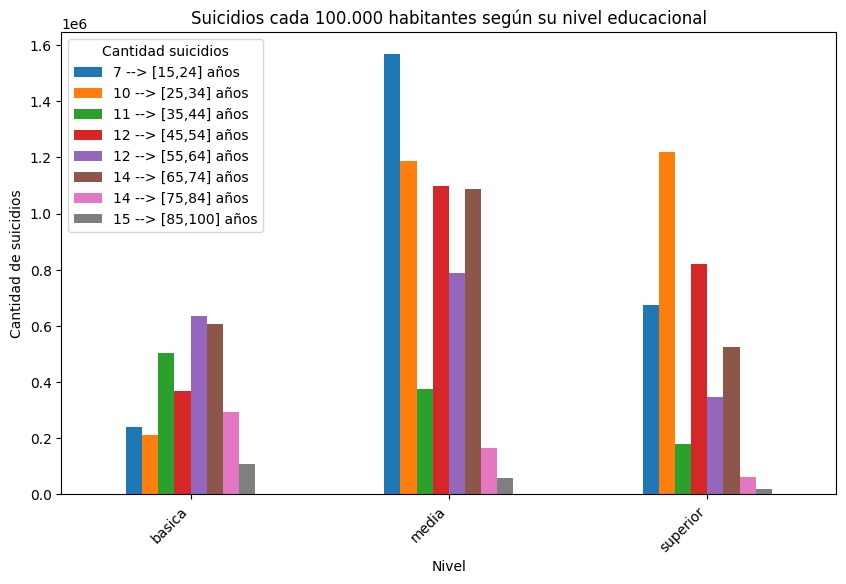

In [18]:
ax = tabla.plot(kind='bar', figsize=(10, 6))
ax.set_title('Suicidios cada 100.000 habitantes según su nivel educacional')
ax.set_xlabel('Nivel')
ax.set_ylabel('Cantidad de suicidios')
ax.legend(["7 --> [15,24] años", "10 --> [25,34] años", "11 --> [35,44] años", "12 --> [45,54] años", "12 --> [55,64] años", "14 --> [65,74] años", "14 --> [75,84] años", "15 --> [85,100] años"], title='Cantidad suicidios')
ax.set_xticklabels(tabla.index, rotation=45, ha='right')
plt.show()

# 5. ¿Cómo afecta la religión a la tasa de suicidios en diferentes países? (Guiliad)

# 6. ¿Cómo influye el acceso a la tecnología en la tasa de suicidios en diferentes grupos demográficos?

# 7. ¿Se relaciona la tasa de suicidios con la esperanza de vida de los países?